In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns
import category_encoders as ce

from sklearn.preprocessing import MinMaxScaler, Imputer

In [3]:
print('\n'.join(os.listdir("data")))

bureau_balance.csv
test_raw.csv
application_train.csv
train_raw.csv
bureau.csv
HomeCredit_columns_description.csv
credit_card_balance.csv
installments_payments.csv
POS_CASH_balance.csv
sample_submission.csv
previous_application.csv
application_test.csv


In [4]:
train_raw = pd.read_csv('data/train_raw.csv')
test_raw = pd.read_csv('data/test_raw.csv')

In [26]:
application_train = pd.read_csv('data/application_train.csv')
application_test = pd.read_csv('data/application_test.csv')

In [6]:
print(train_raw.shape)
print(test_raw.shape)
train_raw.describe()

(307511, 809)
(48744, 808)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_INSTALMENT_min_sum,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_INSTALMENT_sum_max,client_installments_AMT_PAYMENT_mean_sum,client_installments_AMT_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_max_sum,client_installments_AMT_PAYMENT_max_sum,client_installments_AMT_PAYMENT_sum_sum,client_installments_AMT_INSTALMENT_sum_sum
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307499.000000,3.072330e+05,306219.000000,...,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05
mean,278180.518577,0.080729,0.080729,0.080729,0.080729,0.417052,1.687979e+05,27108.573909,5.383962e+05,0.080841,...,2.867948e+05,4.040328e+05,3.995838e+05,3.882193e+05,6.786865e+05,6.724159e+05,3.061021e+06,3.100218e+06,1.517517e+07,1.540802e+07
std,102790.175348,0.008417,0.014907,0.005953,0.001675,0.722121,2.371231e+05,14493.737315,3.694465e+05,0.002822,...,3.944197e+05,5.197125e+05,5.142817e+05,4.684538e+05,9.162773e+05,8.800911e+05,6.551933e+06,6.607573e+06,3.392876e+07,3.439291e+07
min,100002.000000,0.054783,0.000000,0.072437,0.079616,0.000000,2.565000e+04,1615.500000,4.050000e+04,0.073768,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,189145.500000,0.083459,0.069993,0.072437,0.079616,0.000000,1.125000e+05,16524.000000,2.385000e+05,0.081830,...,6.173305e+04,9.587241e+04,9.684225e+04,9.970971e+04,1.308395e+05,1.346728e+05,1.826104e+05,1.838517e+05,1.132009e+06,1.160750e+06
50%,278202.000000,0.083459,0.069993,0.085002,0.079616,0.000000,1.471500e+05,24903.000000,4.500000e+05,0.081830,...,1.508296e+05,2.160097e+05,1.931552e+05,1.995731e+05,3.186692e+05,3.283722e+05,5.457494e+05,5.526772e+05,3.539287e+06,3.662790e+06
75%,367142.500000,0.083459,0.101419,0.085002,0.083249,1.000000,2.025000e+05,34596.000000,6.795000e+05,0.081830,...,3.450571e+05,4.948028e+05,4.939762e+05,4.983746e+05,8.331451e+05,8.432570e+05,2.367600e+06,2.416336e+06,1.401902e+07,1.426076e+07
max,456255.000000,0.083459,0.101419,0.085002,0.083249,19.000000,1.170000e+08,258025.500000,4.050000e+06,0.098305,...,6.829794e+06,8.280314e+06,1.934759e+07,1.934759e+07,2.553705e+07,2.327473e+07,2.351041e+08,2.351041e+08,3.908885e+09,3.923054e+09


In [18]:
print("\n".join(sorted(train_raw.columns)))

AMT_ANNUITY
AMT_GOODS_PRICE
AMT_INCOME_TOTAL
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_YEAR
BASEMENTAREA_MEDI
CNT_CHILDREN
CODE_GENDER
COMMONAREA_MODE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_ID_PUBLISH
DAYS_LAST_PHONE_CHANGE
DAYS_REGISTRATION
DEF_30_CNT_SOCIAL_CIRCLE
ELEVATORS_MODE
EMERGENCYSTATE_MODE
ENTRANCES_AVG
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
FLAG_CONT_MOBILE
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_2
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_EMAIL
FLAG_EMP_PHONE
FLAG_MOBIL
FLAG_OWN_CAR
FLAG_OWN_REALTY
FLAG_PHONE
FLAG_WORK_PHONE
FLOORSMAX_MODE
FLOORSMIN_MEDI
FONDKAPREMONT_MODE
HOUR_APPR_PROCESS_START
HOUSETYPE_MODE
LANDAREA_MED

# Deals with anomalies

In [20]:
print('anomalies count =', len(train_raw[train_raw['DAYS_EMPLOYED'] == 365243.000000]))

anomalies count = 55374


There are 9274 anomalies in the test data out of 48744 entries


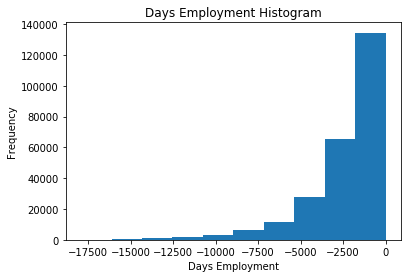

In [21]:
# Create an anomalous flag column
train_raw['DAYS_EMPLOYED_ANOM'] = train_raw["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train_raw['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train_raw['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

#redo with test
test_raw['DAYS_EMPLOYED_ANOM'] = test_raw["DAYS_EMPLOYED"] == 365243
test_raw["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test_raw["DAYS_EMPLOYED_ANOM"].sum(), len(test_raw)))

# Adding Knowledge

In [28]:
train_eng = train_raw.copy()
test_eng = test_raw.copy()


application_train['CREDIT_INCOME_PERCENT'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']
application_train['CREDIT_TERM'] = application_train['AMT_ANNUITY'] / application_train['AMT_CREDIT']
train_eng['ANNUITY_INCOME_PERCENT'] = train_eng['AMT_ANNUITY'] / train_eng['AMT_INCOME_TOTAL']
train_eng['DAYS_EMPLOYED_PERCENT'] = train_eng['DAYS_EMPLOYED'] / train_eng['DAYS_BIRTH']

application_test['CREDIT_INCOME_PERCENT'] = application_test['AMT_CREDIT'] / application_test['AMT_INCOME_TOTAL']
application_test['CREDIT_TERM'] = application_test['AMT_ANNUITY'] / application_test['AMT_CREDIT']
test_eng['ANNUITY_INCOME_PERCENT'] = test_eng['AMT_ANNUITY'] / test_eng['AMT_INCOME_TOTAL']
test_eng['DAYS_EMPLOYED_PERCENT'] = test_eng['DAYS_EMPLOYED'] / test_eng['DAYS_BIRTH']

train_eng = train_eng.merge(application_train[['CREDIT_INCOME_PERCENT', 'CREDIT_TERM', 'SK_ID_CURR']], on = 'SK_ID_CURR', how = 'left')
test_eng = test_eng.merge(application_test[['CREDIT_INCOME_PERCENT', 'CREDIT_TERM', 'SK_ID_CURR']], on = 'SK_ID_CURR', how = 'left')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,client_installments_AMT_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_max_sum,client_installments_AMT_PAYMENT_max_sum,client_installments_AMT_PAYMENT_sum_sum,client_installments_AMT_INSTALMENT_sum_sum,DAYS_EMPLOYED_ANOM,ANNUITY_INCOME_PERCENT,DAYS_EMPLOYED_PERCENT,CREDIT_INCOME_PERCENT,CREDIT_TERM
0,100001,0.083459,0.069993,0.085002,0.079616,0,135000.0,20560.5,450000.0,0.081830,...,41195.926,8.153775e+04,8.153775e+04,1.528387e+05,1.528387e+05,False,0.152300,0.121044,4.213333,0.036147
1,100005,0.083459,0.101419,0.085002,0.079616,0,99000.0,17370.0,180000.0,0.081830,...,56161.844,1.589062e+05,1.589062e+05,5.054566e+05,5.054566e+05,False,0.175455,0.247398,2.250182,0.077973
2,100013,0.083459,0.101419,0.072437,0.079616,0,202500.0,69777.0,630000.0,NaN,...,1689174.200,2.535006e+07,2.535006e+07,9.676208e+07,1.016256e+08,False,0.344578,0.222477,3.275378,0.105202
3,100028,0.083459,0.069993,0.085002,0.079616,2,315000.0,49018.5,1575000.0,0.081830,...,562658.900,1.284615e+06,1.284615e+06,2.756639e+07,3.347564e+07,False,0.155614,0.133515,5.000000,0.031123
4,100038,0.083459,0.101419,0.072437,0.083249,1,180000.0,32067.0,625500.0,0.081830,...,133204.050,1.332072e+05,1.332072e+05,1.598448e+06,1.598448e+06,False,0.178150,0.168021,3.475000,0.051266
5,100042,0.083459,0.069993,0.072437,0.079616,0,270000.0,34600.5,810000.0,0.081830,...,4025872.200,2.715720e+07,2.715720e+07,1.106985e+08,1.124973e+08,False,0.128150,0.645506,3.554400,0.036054
6,100057,0.083459,0.101419,0.072437,0.079616,2,180000.0,22117.5,373500.0,0.081830,...,98454.240,1.889994e+05,1.889994e+05,3.460973e+05,3.460973e+05,False,0.122875,0.154630,2.773450,0.044304
7,100065,0.083459,0.101419,0.085002,0.079616,0,166500.0,14220.0,180000.0,0.081830,...,90726.750,9.075352e+04,9.075352e+04,4.536338e+05,4.536338e+05,False,0.085405,0.145755,1.081081,0.079000
8,100066,0.083459,0.069993,0.085002,0.079616,0,315000.0,28957.5,315000.0,0.081830,...,462152.000,5.668664e+05,5.668664e+05,5.229329e+06,5.229329e+06,False,0.091929,0.079488,1.158400,0.079358
9,100067,0.083459,0.069993,0.072437,0.079616,1,162000.0,5337.0,45000.0,0.074946,...,654381.940,5.568810e+06,5.568810e+06,4.079891e+07,4.079891e+07,False,0.032944,0.252525,0.277778,0.118600


In [30]:
print(train_eng.shape)
print(test_eng.shape)

(307511, 814)
(48744, 813)


## Let's see corelation now

In [31]:
# Find correlations with the target and sort
correlations = train_eng.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 client_credit_AMT_RECIVABLE_mean_max                0.086919
client_credit_AMT_TOTAL_RECEIVABLE_mean_max         0.086932
client_credit_AMT_BALANCE_mean_min                  0.086997
client_credit_AMT_BALANCE_mean_mean                 0.087177
client_credit_AMT_BALANCE_mean_max                  0.087617
client_bureau_balance_MONTHS_BALANCE_min_mean       0.089038
client_credit_CNT_DRAWINGS_CURRENT_max_min          0.100648
client_credit_CNT_DRAWINGS_CURRENT_max_mean         0.100921
client_credit_CNT_DRAWINGS_CURRENT_max_max          0.101389
client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_min     0.107636
client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_mean    0.107713
client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max     0.108340
TARGET                                              1.000000
client_credit_SK_DPD_min_mean                            NaN
client_credit_SK_DPD_min_sum                             NaN
Name: TARGET, dtype: float64

Most Negative Correlations

## Just save for now -------------------------------------------- continue here -------------------------------

In [32]:
train_eng.to_csv('data/Train_Eng.csv', index = False)
test_eng.to_csv('data/Test_Eng.csv', index = False)

# just for fun try with logistic

In [9]:
# Drop the target from the training data
if 'TARGET' in train_raw:
    train = train_raw.drop(columns = ['TARGET'])
else:
    train = train_raw.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = test_raw.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_raw['TARGET'])

# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
submit = test_raw[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

# Save the submission to a csv file
submit.to_csv('log_reg_All_table.csv', index = False)

Training data shape:  (307511, 808)
Testing data shape:  (48744, 808)


NameError: name 'application_train' is not defined

# trying to do pca

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=808)
train_PCA = pca.fit_transform(train)
test_PCA = pca.transform(test)

In [12]:
print(train_PCA.shape)
print(test_PCA.shape)

(307511, 808)
(48744, 808)


In [13]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train_PCA, train_raw['TARGET'])

# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test_PCA)[:, 1]

# Submission dataframe
submit = test_raw[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

# Save the submission to a csv file
submit.to_csv('log_reg_All_table_PCA.csv', index = False)

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
